In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

movies_df = pd.read_csv(r'C:\Users\E1460340\Downloads\movies_metadata.csv', low_memory= False)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'],errors='coerce') # Convert data type of release_date to datetime.
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce') # Convert data type of budget to numeric.
movies_df['imdb_id'] = pd.to_numeric(movies_df['imdb_id'], errors='coerce') # Convert data type of imdb_id to numeric.
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce') # Convert data type of id to numeric.

def list_name(string_list_dict): # Convert the string list of dictionary into list of name.
    list_dict = ast.literal_eval(string_list_dict) if pd.notna(string_list_dict) else string_list_dict
    return [dict['name'] for dict in list_dict] if isinstance(list_dict,list) else []

movies_df['genres'] = movies_df['genres'].apply(lambda x: list_name(x))
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: list_name(x))
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda x: list_name(x))
movies_df = movies_df.dropna(subset= 'title', axis= 'index')

# Are there any notable trends in genre popularity or movie ratings over time?

### Movie Genres Over Time

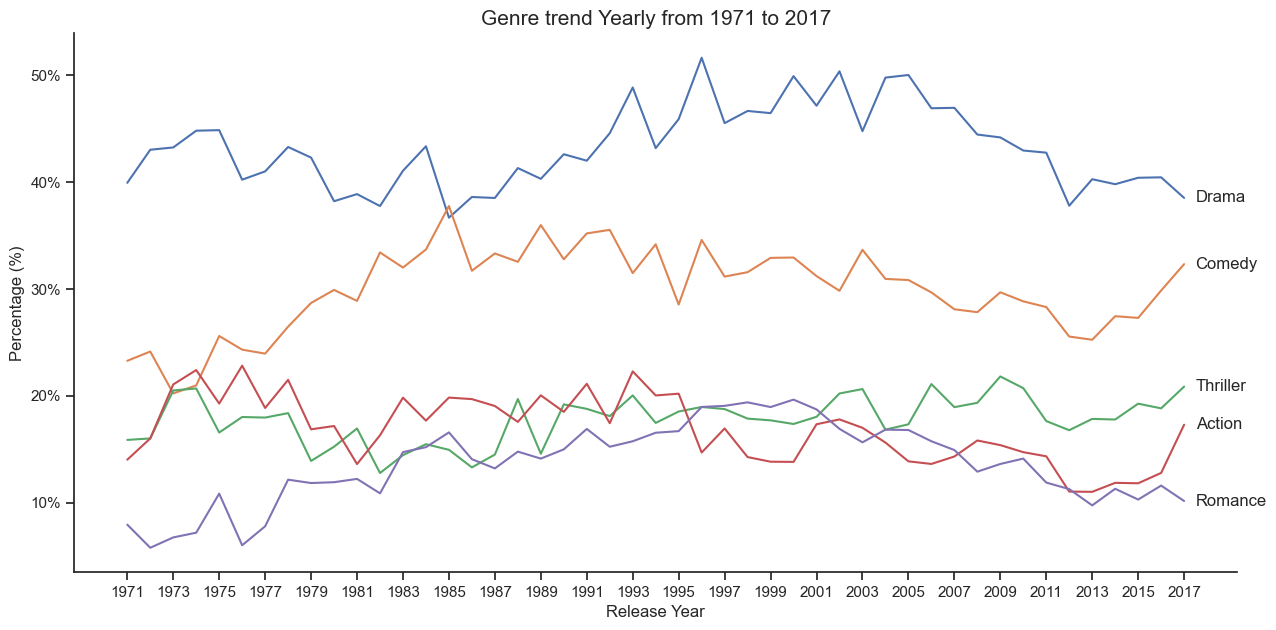

In [135]:
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_1971_2017 = movies_df[(movies_df['release_year'] > 1970) & (movies_df['release_year'] < 2018)]
movies_count_yearly = movies_1971_2017['release_year'].value_counts().sort_index()

genres_explode = movies_1971_2017.explode('genres')
top5_genres = genres_explode['genres'].value_counts().sort_values(ascending= False).head(5).index.to_list()

genres_pivot = genres_explode.pivot_table(columns= 'genres', index= 'release_year', aggfunc= 'size').fillna(0)
genres_perc = genres_pivot.div(movies_count_yearly / 100, axis= 0)

ticks_year = list(range(1971,2019,2))

plt.figure(figsize= (15,7))
sns.set_theme(style= 'ticks')
sns.lineplot(
    data= genres_perc[top5_genres]
    ,dashes= False
    ,legend= False
)
ax= plt.gca()
ax.set_title('Genre trend Yearly from 1971 to 2017', fontsize= 15)
ax.set_xlabel('Release Year')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(ticks_year)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'{x:.0f}%'))
ax.spines[['top','right']].set_visible(False)
for genre in top5_genres:
    ax.text(
        x= 2017.5
        ,y= genres_perc.loc[[2017],[genre]].values
        ,s= genre
        ,va= 'center'
    )

### Movie Rating Over Time

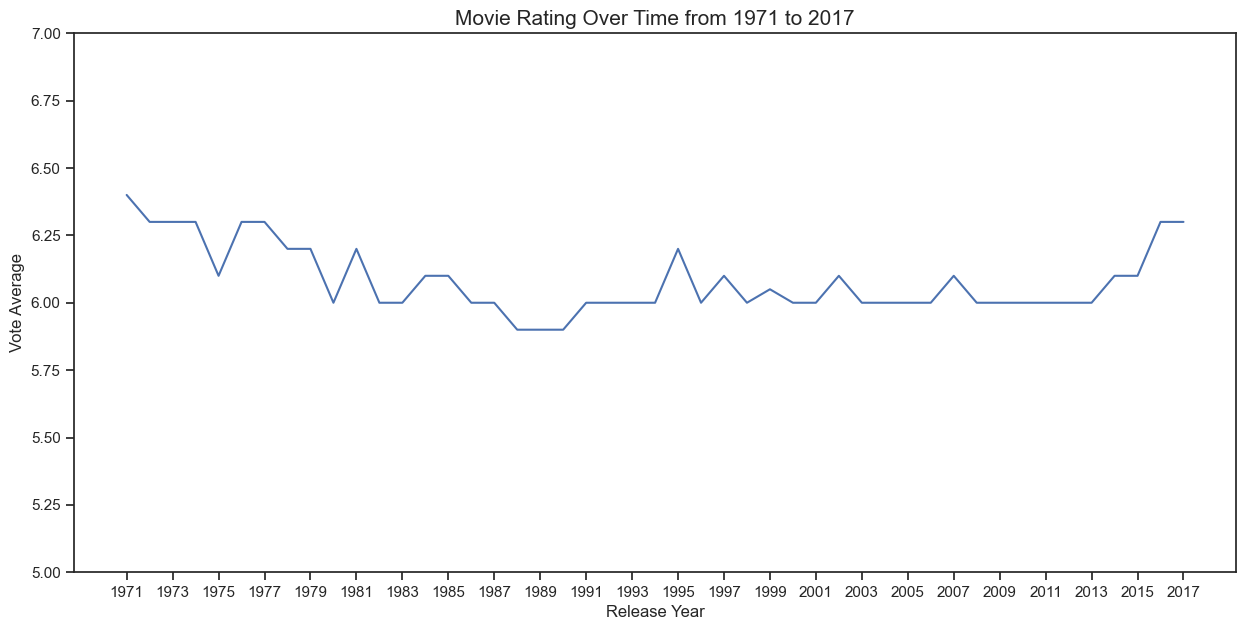

In [ ]:
movie_ratings = movies_1971_2017[movies_1971_2017['vote_average'] > 0]
yearly_ratings = movie_ratings.groupby('release_year')['vote_average'].median()
ticks_year = list(range(1971,2019,2))

plt.figure(figsize= (15,7))
sns.lineplot(yearly_ratings)

plt.xticks(ticks_year)
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.title('Movie Rating Over Time from 1971 to 2017', fontsize= 15)
plt.ylim(5,7)
plt.show()